In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("polaritysentimen.xlsx")

df.head()

,Polarity,Sentiment
0,0.000000,0
1,0.166667,1
2,0.000000,0
3,0.000000,0
4,0.000000,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Polarity   778 non-null    float64
 1   Sentiment  778 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 12.3 KB


In [3]:
np.sum(df.isnull().any(axis=1))

0

In [4]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   778


In [5]:
df['Sentiment'].unique()

array([ 0,  1, -1], dtype=int64)

In [6]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   778


In [7]:
import numpy as np
 
roc_point = []
thresholds = list(np.array(list(range(0, 1000+1, 1)))/1000)
 
for threshold in thresholds:

    tp = 146; fp = 10; fn = 10; tn = 310

    for index, instance in df.iterrows():
        actual = instance["Sentiment"]
        prediction = instance["Polarity"]

        if prediction >= threshold:
            prediction_class = 1
        else:
            prediction_class = 0

        if prediction_class == 1 and actual == 1:
            tp = tp + 1
        elif actual == 1 and prediction_class == 0:
            fn = fn + 1
        elif actual == 0 and prediction_class == 1: 
            fp = fp + 1
        elif actual == 0 and prediction_class == 0:
            tn = tn + 1

    tpr = tp / (tp + fn)
    fpr = fp / (tn + fp)

    roc_point.append([tpr, fpr])

In [8]:
pivot = pd.DataFrame(roc_point, columns = ["x", "y"])
pivot["Jadi"] = thresholds

In [9]:
pivot.sample(10)

,x,y,Jadi
680,0.484241,0.014164,0.680
260,0.624642,0.014164,0.260
294,0.624642,0.014164,0.294
476,0.555874,0.014164,0.476
69,0.971347,0.014164,0.069
268,0.624642,0.014164,0.268
489,0.555874,0.014164,0.489
97,0.971347,0.014164,0.097
311,0.621777,0.014164,0.311
470,0.555874,0.014164,0.470


In [11]:
from numpy import trapz
auc = round(abs(np.trapz(pivot.x, pivot.y)), 4)
auc

0.5311

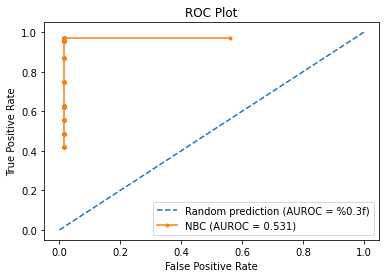

In [12]:
plt.plot([0, 1], linestyle='--', label='Random prediction (AUROC = %0.3f)')
plt.plot(pivot.y, pivot.x, marker='.', label='NBC (AUROC = %0.3f)' % auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()